In [17]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [18]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

In [19]:
df = daily_price_historical('BTC','USD')

df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.0920,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,49.6600,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,20.5900,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,42.2600,0.07921,direct,,2010-07-21
5,1279756800,0.08181,0.05050,0.07921,2160.00,129.7800,0.05050,direct,,2010-07-22
6,1279843200,0.06767,0.05050,0.05050,2402.50,141.0700,0.06262,direct,,2010-07-23
7,1279929600,0.06161,0.05049,0.06262,496.32,26.7300,0.05454,direct,,2010-07-24
8,1280016000,0.05941,0.05050,0.05454,1551.48,85.0600,0.05050,direct,,2010-07-25
9,1280102400,0.05600,0.05000,0.05050,877.00,46.9100,0.05600,direct,,2010-07-26


In [20]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
4607,1677369600,23673.78,23068.21,23167.45,27038.81,6.314675e+08,23557.39,direct,,2023-02-26
4608,1677456000,23876.65,23144.28,23557.39,44498.06,1.044207e+09,23490.07,direct,,2023-02-27
4609,1677542400,23596.23,23039.39,23490.07,34848.42,8.140387e+08,23134.20,direct,,2023-02-28
4610,1677628800,23962.77,23037.24,23134.20,45286.75,1.069269e+09,23641.20,direct,,2023-03-01
4611,1677715200,23788.72,23212.33,23641.20,34699.93,8.128111e+08,23467.22,direct,,2023-03-02
4612,1677801600,23476.96,22147.42,23467.22,59219.77,1.327278e+09,22361.45,direct,,2023-03-03
4613,1677888000,22410.72,22179.49,22361.45,11820.44,2.639006e+08,22351.08,direct,,2023-03-04
4614,1677974400,22632.51,22240.41,22351.08,20845.84,4.677936e+08,22433.65,direct,,2023-03-05
4615,1678060800,22596.13,22304.69,22433.65,27062.82,6.069781e+08,22410.34,direct,,2023-03-06
4616,1678147200,22540.33,22339.65,22410.34,7566.14,1.697141e+08,22396.10,direct,,2023-03-07


In [21]:
limit = datetime(2020,12,31)
start = datetime(2018,1,1)
df_train = df[(df['timestamp'] <= limit )]
df_train = df_train[(df_train['timestamp'] >= start)]

days = [val for val in df_train['timestamp'] ]
prices = [val for val in df_train['close'] ]
dict = {'Date': days, 'Close': prices}

In [22]:
df_train = pd.DataFrame(dict) 
filename = 'train_prices.csv'
df_train.to_csv(filename, index=False) 

print(f"{filename} created successfully.")

train_prices.csv created successfully.


In [23]:
#rename columns
prophet_df = df_train.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [24]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

13:12:06 - cmdstanpy - INFO - Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=365)

#predict
forecast = model.predict(future)
     

#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,10215.146737,11723.486966,14082.230672,10215.146737,10215.146737,2758.747461,2758.747461,2758.747461,19.149766,19.149766,19.149766,2739.597695,2739.597695,2739.597695,0.0,0.0,0.0,12973.894198
1,2018-01-02,10175.263781,11714.605440,14204.566264,10175.263781,10175.263781,2815.097651,2815.097651,2815.097651,-4.244244,-4.244244,-4.244244,2819.341895,2819.341895,2819.341895,0.0,0.0,0.0,12990.361432
2,2018-01-03,10135.380825,11673.252441,14223.556586,10135.380825,10135.380825,2903.767919,2903.767919,2903.767919,18.281559,18.281559,18.281559,2885.486360,2885.486360,2885.486360,0.0,0.0,0.0,13039.148743
3,2018-01-04,10095.497869,11684.428400,14205.678676,10095.497869,10095.497869,2914.071865,2914.071865,2914.071865,-23.770753,-23.770753,-23.770753,2937.842619,2937.842619,2937.842619,0.0,0.0,0.0,13009.569734
4,2018-01-05,10055.614913,11789.642131,14191.989436,10055.614913,10055.614913,2958.080709,2958.080709,2958.080709,-18.314123,-18.314123,-18.314123,2976.394832,2976.394832,2976.394832,0.0,0.0,0.0,13013.695622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,42949.788162,21477.750810,67397.504721,19582.096859,64976.478534,2174.468973,2174.468973,2174.468973,19.149766,19.149766,19.149766,2155.319208,2155.319208,2155.319208,0.0,0.0,0.0,45124.257135
1457,2021-12-28,43011.275287,22204.507921,67462.400288,19560.311749,65115.151543,2290.108416,2290.108416,2290.108416,-4.244244,-4.244244,-4.244244,2294.352660,2294.352660,2294.352660,0.0,0.0,0.0,45301.383703
1458,2021-12-29,43072.762413,22162.083964,68302.529943,19561.205617,65305.317191,2441.501001,2441.501001,2441.501001,18.281559,18.281559,18.281559,2423.219442,2423.219442,2423.219442,0.0,0.0,0.0,45514.263413
1459,2021-12-30,43134.249538,22199.895679,67852.116124,19562.099485,65495.482839,2517.152964,2517.152964,2517.152964,-23.770753,-23.770753,-23.770753,2540.923717,2540.923717,2540.923717,0.0,0.0,0.0,45651.402502


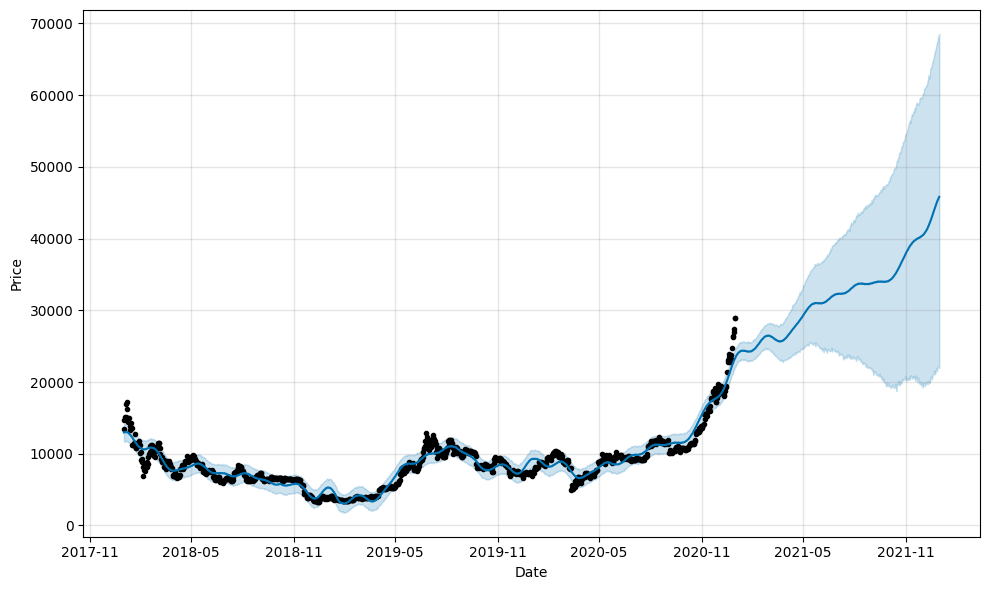

In [26]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

In [27]:
data = prophet_df[['ds','y']]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

             ds         y
0    2018-01-01  13444.88
1    2018-01-02  14754.13
2    2018-01-03  15156.62
3    2018-01-04  15180.08
4    2018-01-05  16954.78
...         ...       ...
1091 2020-12-27  26249.27
1092 2020-12-28  27039.45
1093 2020-12-29  27360.78
1094 2020-12-30  28889.61
1095 2020-12-31  28972.40

[1096 rows x 2 columns]


,ds,y
0,2018-01-01,13444.88
1,2018-01-02,14754.13
2,2018-01-03,15156.62
3,2018-01-04,15180.08
4,2018-01-05,16954.78


In [28]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=500)
future = m.make_future_dataframe(data, periods=365)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (35) is too small than the required number for the learning rate finder (226). The results might not be optimal.


Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,24050.669922,21017.576172,3056.477051,-23.382967
1,2021-01-02,None,24229.640625,21074.017578,3148.368164,7.255575
2,2021-01-03,None,24350.365234,21130.451172,3235.066162,-15.150905
3,2021-01-04,None,24518.035156,21186.884766,3316.507080,14.641492
4,2021-01-05,None,24633.121094,21243.326172,3392.669434,-2.874323


In [29]:
forecast.tail(10)

,ds,y,yhat1,trend,season_yearly,season_weekly
355,2021-12-22,None,42946.191406,41053.226562,1860.655029,32.309788
356,2021-12-23,None,43089.898438,41109.667969,1993.029053,-12.798664
357,2021-12-24,None,43265.738281,41166.101562,2123.020508,-23.382967
358,2021-12-25,None,43480.007812,41222.542969,2250.211182,7.255575
359,2021-12-26,None,43638.035156,41278.980469,2374.205811,-15.150905
360,2021-12-27,None,43844.695312,41335.417969,2494.636475,14.641492
361,2021-12-28,None,44000.148438,41391.855469,2611.165527,-2.874323
362,2021-12-29,None,44204.093750,41448.296875,2723.487793,32.309788
363,2021-12-30,None,44323.273438,41504.738281,2831.334473,-12.798664
364,2021-12-31,None,44472.265625,41561.175781,2934.470703,-23.382967


In [30]:
limit = datetime(2021,12,31)
start = datetime(2021,1,1)
df_real = df[(df['timestamp'] <= limit )]
df_real = df_real[(df_real['timestamp'] >= start)]

print(df_real)

            time      high       low      open  volumefrom      volumeto  \
3821  1609459200  29666.33  28748.21  28972.40    50841.73  1.487306e+09   
3822  1609545600  33257.29  29036.26  29388.94   119214.75  3.750441e+09   
3823  1609632000  34789.34  32010.59  32203.64    93510.99  3.132759e+09   
3824  1609718400  33622.70  28493.29  33063.48   124909.68  3.901979e+09   
3825  1609804800  34487.44  29985.29  32030.55    93735.47  3.037657e+09   
...          ...       ...       ...       ...         ...           ...   
4181  1640563200  52079.46  50481.26  50790.88    21873.37  1.120188e+09   
4182  1640649600  50718.53  47317.78  50714.73    40699.40  1.985905e+09   
4183  1640736000  48145.34  46107.79  47536.39    33749.80  1.599557e+09   
4184  1640822400  47917.89  45964.28  46471.70    39311.18  1.852207e+09   
4185  1640908800  48573.22  45665.44  47129.66    34737.79  1.636014e+09   

         close conversionType conversionSymbol  timestamp  
3821  29388.94         dire

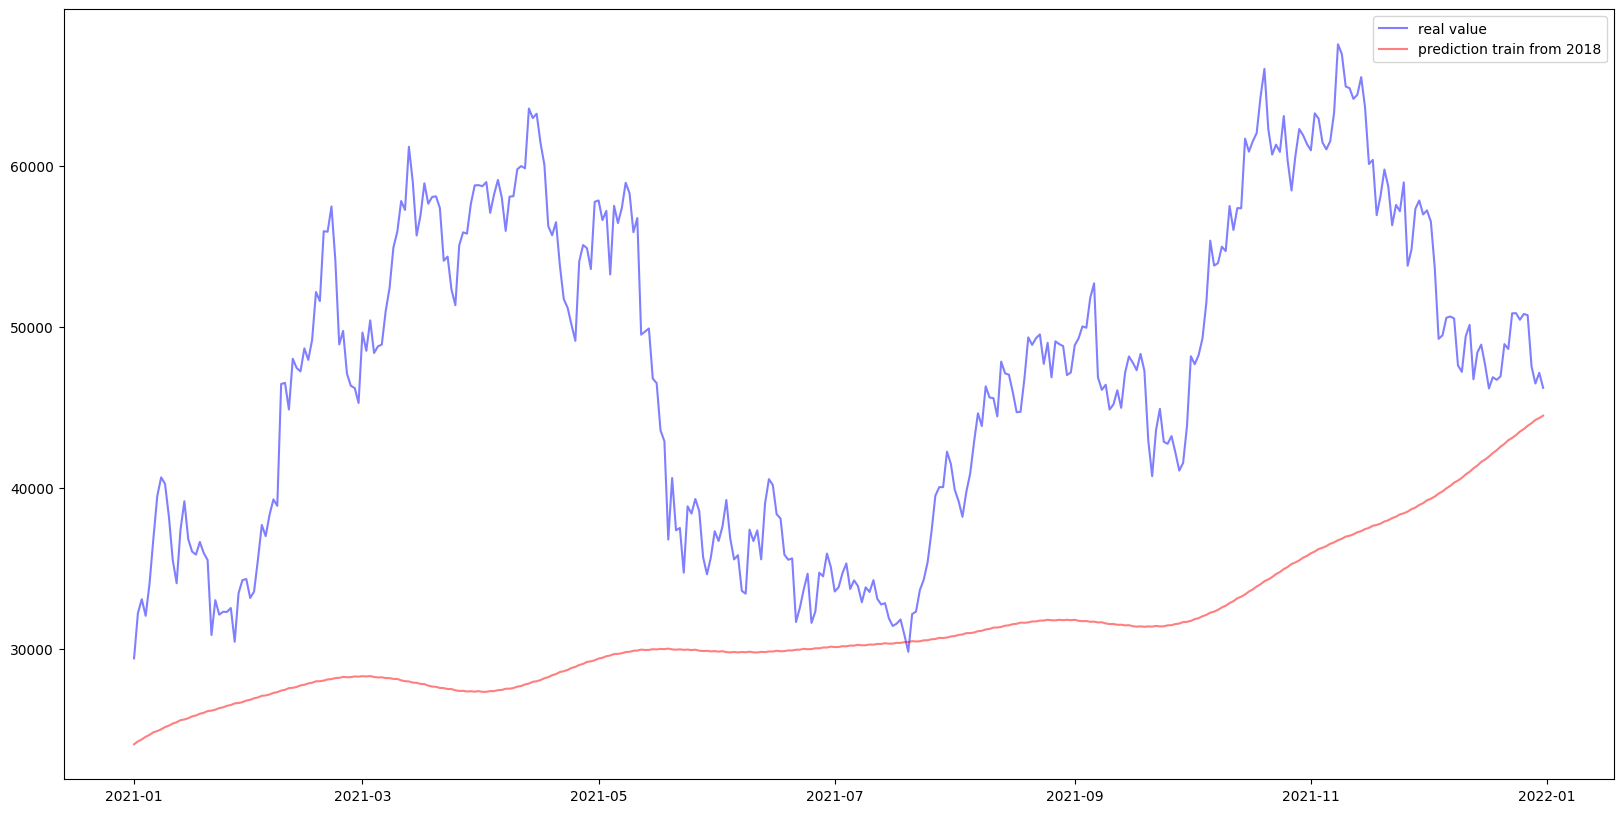

Bad pipe message: %s [b'\xec\x87\x06\xd1m\x0cx\x0f\xa0\xc4\xd8;\xcb\x8a\xb9LlB\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00']
Bad pipe message: %s [b"\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07"]
Bad pipe message: %s [b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'', b'\x03\x03']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'', b'\x02']
Bad pipe message: %s [b'\x05\x02\x06'

In [31]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real value")
plt.plot(forecast['ds'], forecast['yhat1'],color='red',alpha=0.5, label="prediction train from 2018")
plt.legend()
plt.show()